In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install autoNLP
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tqdm-4.49.0-py2.py3-none-any.whl (69 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-ensemble 0.1.7 requires tqdm>=4.50.2, but you have tqdm 4.49.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.49.0
    Uninstalling tqdm-4.49.0:
      Successfully uninstalled tqdm-4.49.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

In [4]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 14.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-ensemble 0.1.7 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.


In [8]:
import neattext as nt
import pandas as pd
import numpy as np
import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

#from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Embedding, Dropout, Flatten, Layer, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K

import warnings
warnings.filterwarnings("ignore")

In [10]:
!pip show neattext

Name: neattext
Version: 0.1.3
Summary: Neattext - a simple NLP package for cleaning text
Home-page: https://github.com/Jcharis/neattext
Author: Jesse E.Agbe(JCharis)
Author-email: jcharistech@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: 


In [11]:
df = pd.read_csv(r"/content/drive/MyDrive/mini_pro/data/ig.csv.xls")

In [12]:
df.head()

,content,score,at
0,Awesome app love that i can post my original s...,5,2022-09-13 18:26:38
1,Ever since Mark Zuckerberg bought this softwar...,1,2022-09-13 13:37:49
2,They need to increase the reel time duration a...,4,2022-09-13 13:32:12
3,"there isn't an ""edit"" feature for the comment....",3,2022-09-13 13:24:33
4,"Like we like a reel, it covers like a phone, a...",1,2022-09-13 13:16:49


In [13]:
df.columns

Index(['content', 'score', 'at'], dtype='object')

In [14]:
df=df[["content","score"]]

In [15]:
df.iloc[20]["content"]

"The new update is just so annoying.... I can't even give reaction on the chats and even the reply option is gone🙄 please fix it ......."

- converting the data into lower case 

In [16]:
# Lowering the text
df['content']= df['content'].apply(lambda x: x.lower())

In [17]:
df.iloc[20]["content"]

"the new update is just so annoying.... i can't even give reaction on the chats and even the reply option is gone🙄 please fix it ......."

**task**
- Removal Punctuation 
- remove html tags
- Remove special character 
- remove userhandels / mentions
- remove hastags
- remove stopwords


In [18]:
# method/attributes
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [19]:
# methos /attributes  of nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
df.iloc[20]["content"]

"the new update is just so annoying.... i can't even give reaction on the chats and even the reply option is gone🙄 please fix it ......."

## function approch

In [21]:
df.head()


,content,score
0,awesome app love that i can post my original s...,5
1,ever since mark zuckerberg bought this softwar...,1
2,they need to increase the reel time duration a...,4
3,"there isn't an ""edit"" feature for the comment....",3
4,"like we like a reel, it covers like a phone, a...",1


In [22]:
df['Clean_Text']=df.content.apply(nfx.remove_userhandles)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_stopwords)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_hashtags)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_special_characters)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emojis)

In [23]:
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_phone_numbers)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currencies)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_dates)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_urls)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emails)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currency_symbols)
df['Clean_Text']=df.Clean_Text.apply(nfx.fix_contractions)

In [24]:
df.iloc[65]["content"]

"absolutely ruined. can't even find what my friends post due to all the absolute garbage that's been dumped in my feed. if i wanted tiktok i would download it. give me the option to remove all this suggested trash."

In [25]:
df.iloc[65]["Clean_Text"]

'absolutely ruined cant find friends post absolute garbage thats dumped feed wanted tiktok download it option remove suggested trash'

In [26]:
df.head()

,content,score,Clean_Text
0,awesome app love that i can post my original s...,5,awesome app love post original singing got rem...
1,ever since mark zuckerberg bought this softwar...,1,mark zuckerberg bought software silly problems...
2,they need to increase the reel time duration a...,4,need increase reel time duration story too iss...
3,"there isn't an ""edit"" feature for the comment....",3,edit feature comment uninteresting ads follow ...
4,"like we like a reel, it covers like a phone, a...",1,like like reel covers like phone attached phon...


In [27]:
# Preview some of the pairs of questions
a = 0 
for i in range(a,a+10):
    print(df.Clean_Text[i])
    print()

awesome app love post original singing got remember trim timeline love stickers effects decorate vidoes alot annoying adds plenty cool content check out

mark zuckerberg bought software silly problems updates activated everyone special rule account accounts banned reason violating privacy incomprehensible bugs arise support group correct answer anyone account closed multiple times reason picture requested code sent it accounts opened again

need increase reel time duration story too issue im enjoying instagram

edit feature comment uninteresting ads follow requests unknown uninteresting persons

like like reel covers like phone attached phone happen phone peoples phone

hands   content best filters best interface need here views views 

application reels video message sending good app boring you app good reels posts entertainment

keeps crashing throwing saying unfortunately instagram stopped working

too ads tired feed refreshing so love choice refresh feed want beginning use less

in

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='score', ylabel='count'>

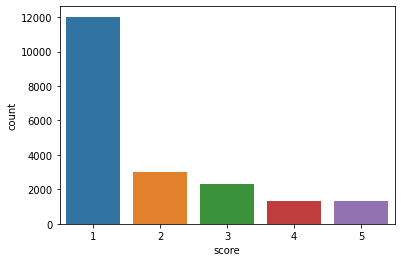

In [29]:
sns.countplot(x = 'score', data = df)

In [30]:
df.describe() #descriptive statistics

,score
count,20000.00000
mean,1.84850
std,1.25093
min,1.00000
25%,1.00000
50%,1.00000
75%,2.00000
max,5.00000


## droping duplicate

In [31]:
df.duplicated().sum()

3

In [32]:
df.shape

(20000, 3)

In [33]:
df=df.drop_duplicates()

In [34]:
df.shape

(19997, 3)

## visualization

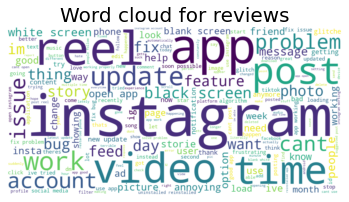

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

allwords = ' '.join([rev for rev in df['Clean_Text']])
wordcloud = WordCloud(width = 1200, height = 600, random_state = 23, background_color="white").generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for reviews',fontsize = 20)
plt.show()

In [36]:
from textblob import TextBlob
df['polarity'] = df.content.apply(lambda x: TextBlob(x).polarity)
df['subjectivity'] = df.content.apply(lambda x: TextBlob(x).subjectivity)

df.head()

,content,score,Clean_Text,polarity,subjectivity
0,awesome app love that i can post my original s...,5,awesome app love post original singing got rem...,0.252778,0.684127
1,ever since mark zuckerberg bought this softwar...,1,mark zuckerberg bought software silly problems...,-0.060714,0.386607
2,they need to increase the reel time duration a...,4,need increase reel time duration story too iss...,0.187500,0.487500
3,"there isn't an ""edit"" feature for the comment....",3,edit feature comment uninteresting ads follow ...,0.300000,0.533333
4,"like we like a reel, it covers like a phone, a...",1,like like reel covers like phone attached phon...,-0.125000,0.375000


In [37]:
df['sentiment'] = np.where(df.polarity > 0, 'positive', np.where(df.polarity < 0, 'negative', 'neutral'))
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "positive" else 0 for each in df.sentiment]
df.head()

,content,score,Clean_Text,polarity,subjectivity,sentiment
0,awesome app love that i can post my original s...,5,awesome app love post original singing got rem...,0.252778,0.684127,1
1,ever since mark zuckerberg bought this softwar...,1,mark zuckerberg bought software silly problems...,-0.060714,0.386607,0
2,they need to increase the reel time duration a...,4,need increase reel time duration story too iss...,0.187500,0.487500,1
3,"there isn't an ""edit"" feature for the comment....",3,edit feature comment uninteresting ads follow ...,0.300000,0.533333,1
4,"like we like a reel, it covers like a phone, a...",1,like like reel covers like phone attached phon...,-0.125000,0.375000,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

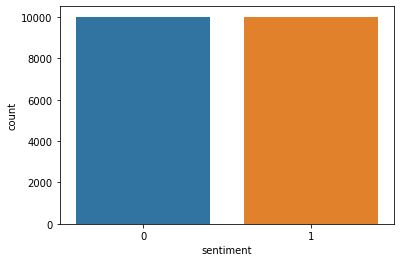

In [38]:
sns.countplot(x = 'sentiment', data = df)

In [39]:
# Shows the top 5 tweets with highest polarity scores
df.nlargest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
468,instagram is nice its also like facebook you c...,instagram nice like facebook find ur friends a...
574,"awesome. but, please, stop disabling account a...",awesome but please stop disabling account anyh...
975,there aren't any features of replying to the r...,features replying reels react reels tried upda...
1157,that's awesome but. when i tried to make a ree...,thats awesome but tried reel crack reel help p...
1294,i can't see any post and any story even i can ...,cant post story comments loading network perfe...
1498,had some challenges and frustrations with inst...,challenges frustrations instagram excellent now
2561,the app is superb but my videos and reels are ...,app superb videos reels exploreing story music...
2974,"excellent app, helpfull to storage you best pi...",excellent app helpfull storage best pictures m...
3115,"great app, never have had problems! two thumbs...",great app problems thumbs up 10 10
3891,instagram is a good app! i would recommend it!...,instagram good app recommend it learned manage...


In [40]:
# Shows the top 5 tweets with lowest polarity scores
df.nsmallest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
818,"every update is getting worst. for instance, i...",update getting worst instance cant video lands...
1048,"worst app, logs you out and then says error an...",worst app logs says error asks phone number lo...
1233,it's disgusting every time while sharing stori...,disgusting time sharing stories search songs s...
1570,now a days there is a bug and error in applica...,days bug error application worst experience ap...
1780,that was a terrible update. the app keeps stop...,terrible update app keeps stopping explore sea...
1863,one of the worst things about instagram is low...,worst things instagram lowering quality videos...
1891,worst experience after update.. instagram noti...,worst experience update instagram notification...
1936,it's the worst application at the moment. acco...,worst application moment accounts hacked help ...
2161,my collabration option is not working for a wh...,collabration option working i reported issue t...
2554,instagram updated version is pathetic.. my acc...,instagram updated version pathetic account mis...


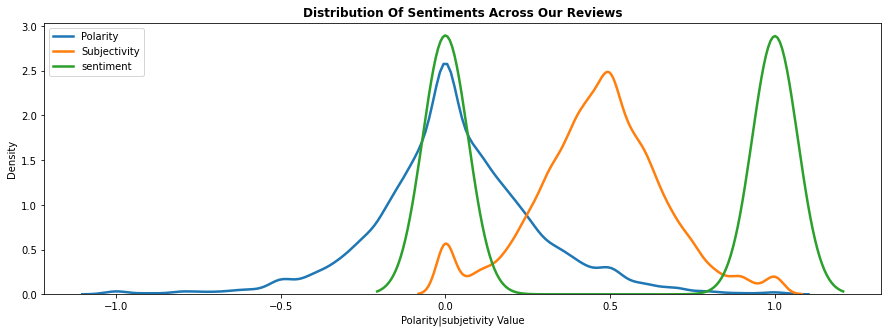

In [41]:
plt.figure(figsize=(15,5))
plt.title('Distribution Of Sentiments Across Our Reviews',fontsize=12,fontweight='bold')
sns.kdeplot(df['polarity'], label='Polarity', lw=2.5)
sns.kdeplot(df['subjectivity'], label='Subjectivity', lw=2.5)
sns.kdeplot(df['sentiment'], label='sentiment', lw=2.5)

plt.xlabel('Polarity|subjetivity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Display the generated image:

plt.legend()
plt.show()

In [42]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(df['sentiment'].value_counts()[1])),'i.e.',round(df['sentiment'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Positive reviews are 10010 i.e. 50.06 % of the dataset
Negative reviews are 9987 i.e. 49.94 % of the dataset


In [1]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
from wordcloud import WordCloud
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['Clean_Text']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

NameError: name 'df' is not defined

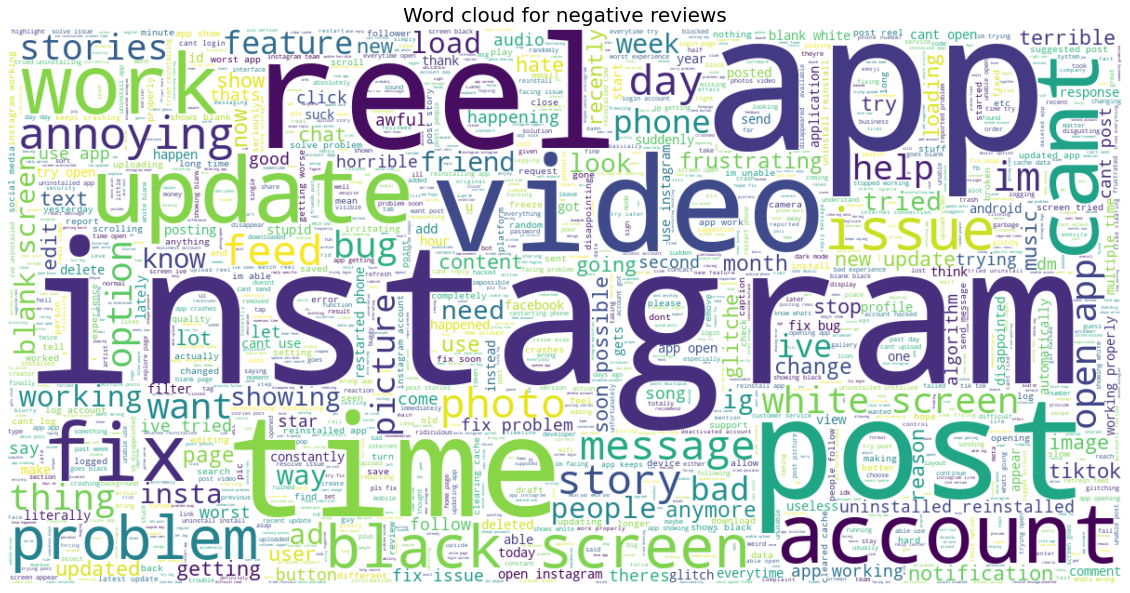

In [44]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['Clean_Text']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

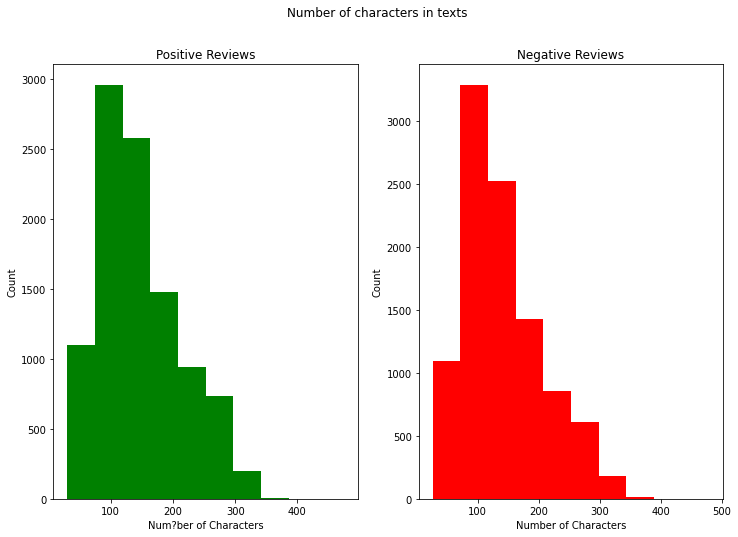

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Num?ber of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

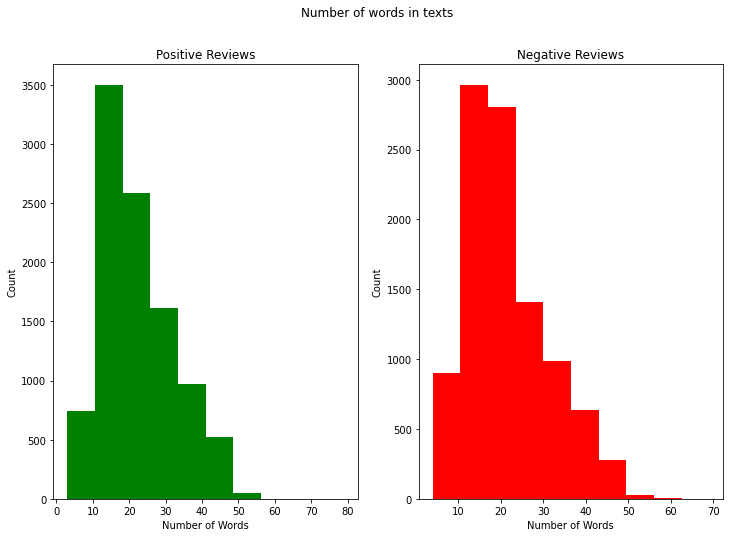

In [46]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

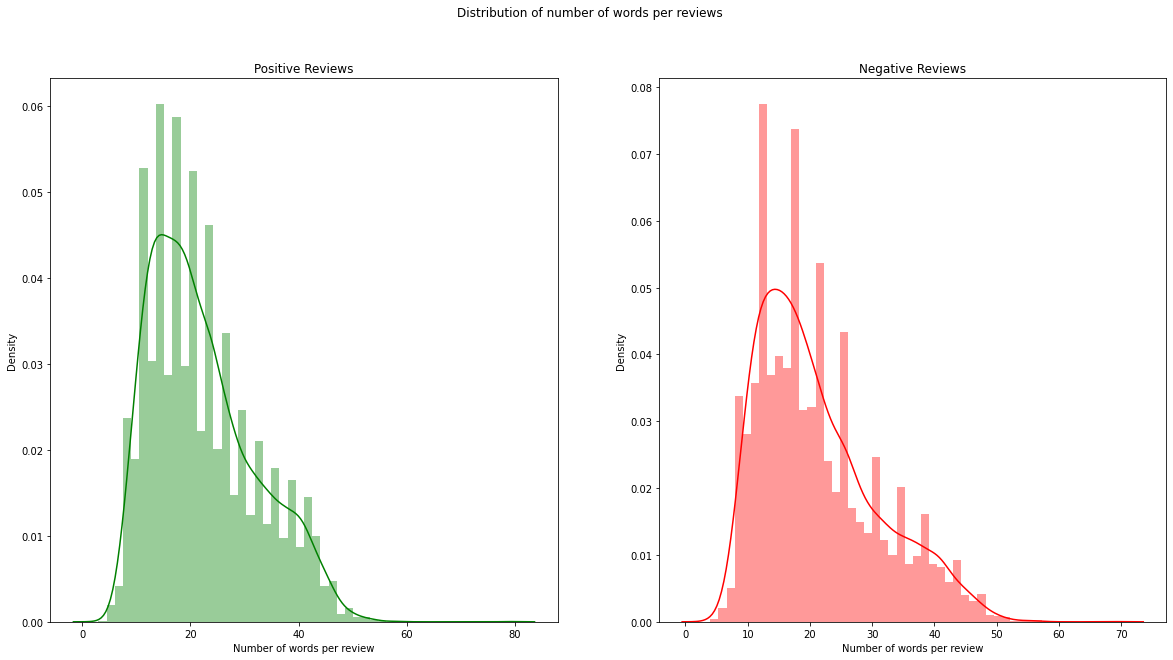

In [47]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

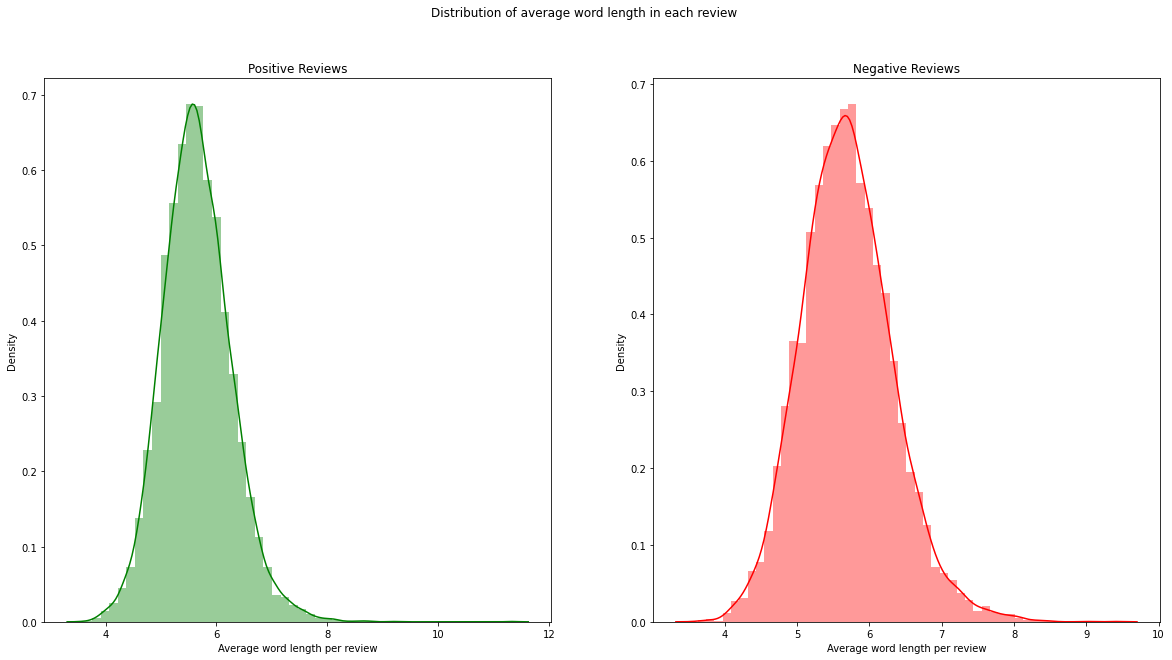

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

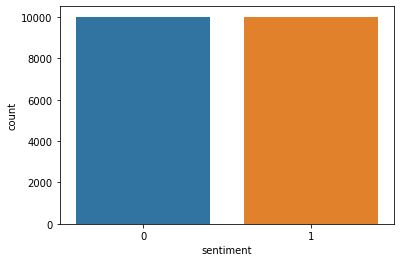

In [49]:
sns.countplot(x = 'sentiment', data = df)

In [50]:
df.columns

Index(['content', 'score', 'Clean_Text', 'polarity', 'subjectivity',
       'sentiment'],
      dtype='object')

In [51]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Clean_Text)
corpus[:5]

['awesome', 'app', 'love', 'post', 'original']

In [52]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

,corpus,countv
0,app,14774
1,instagram,9212
2,cant,5481
3,screen,4344
4,fix,4337
5,like,3990
6,account,3843
7,reels,3786
8,post,3761
9,problem,3610


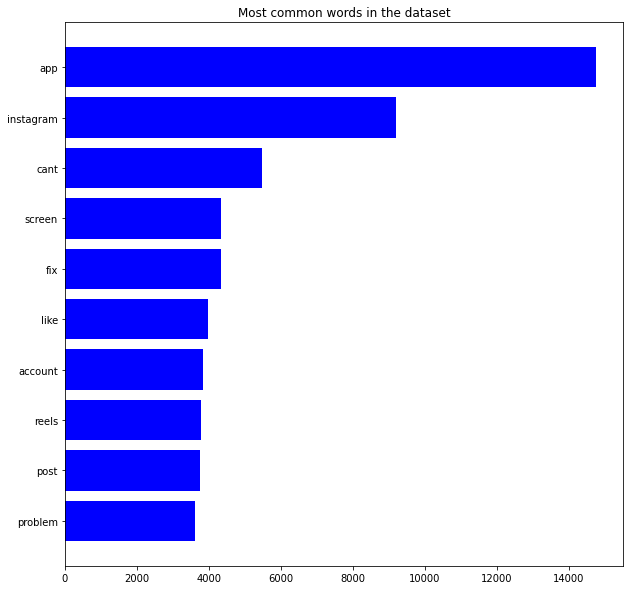

In [53]:
most_common = most_common.sort_values('countv')
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()

In [54]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

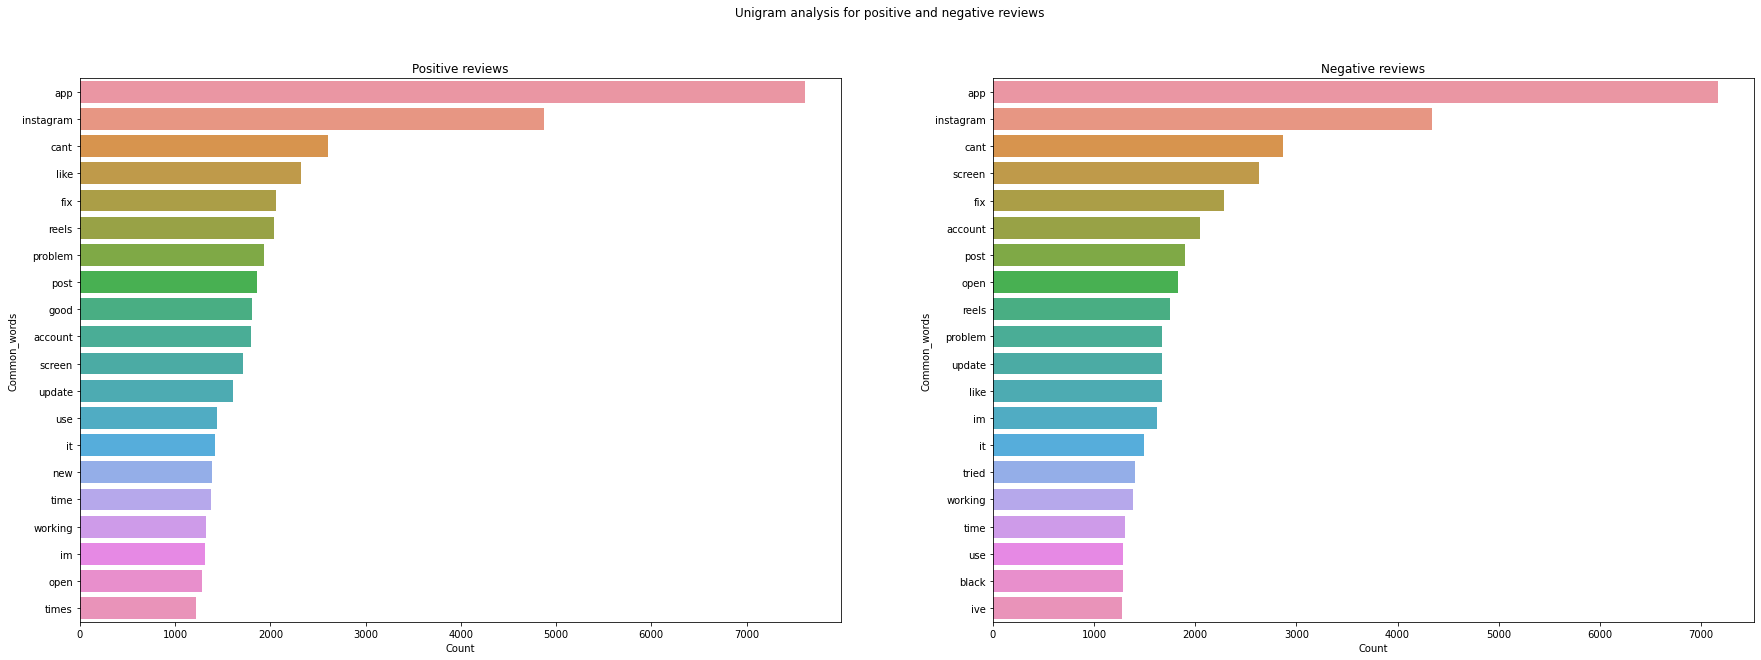

In [55]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30, 10))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

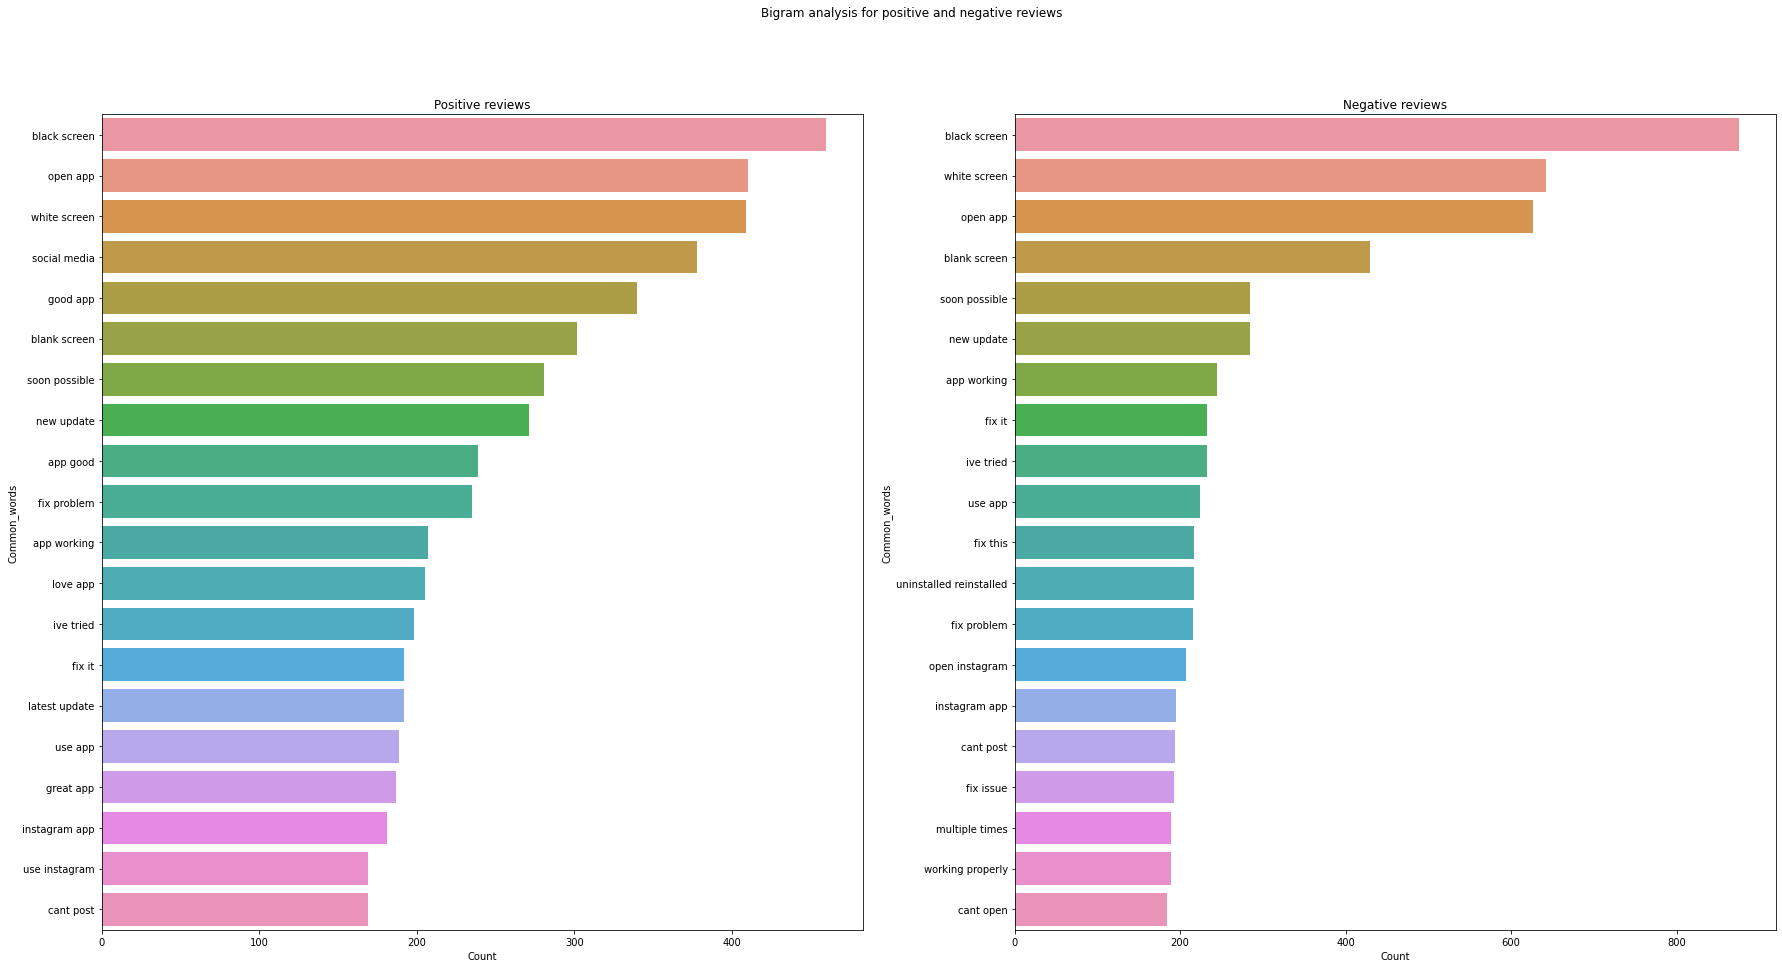

In [56]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

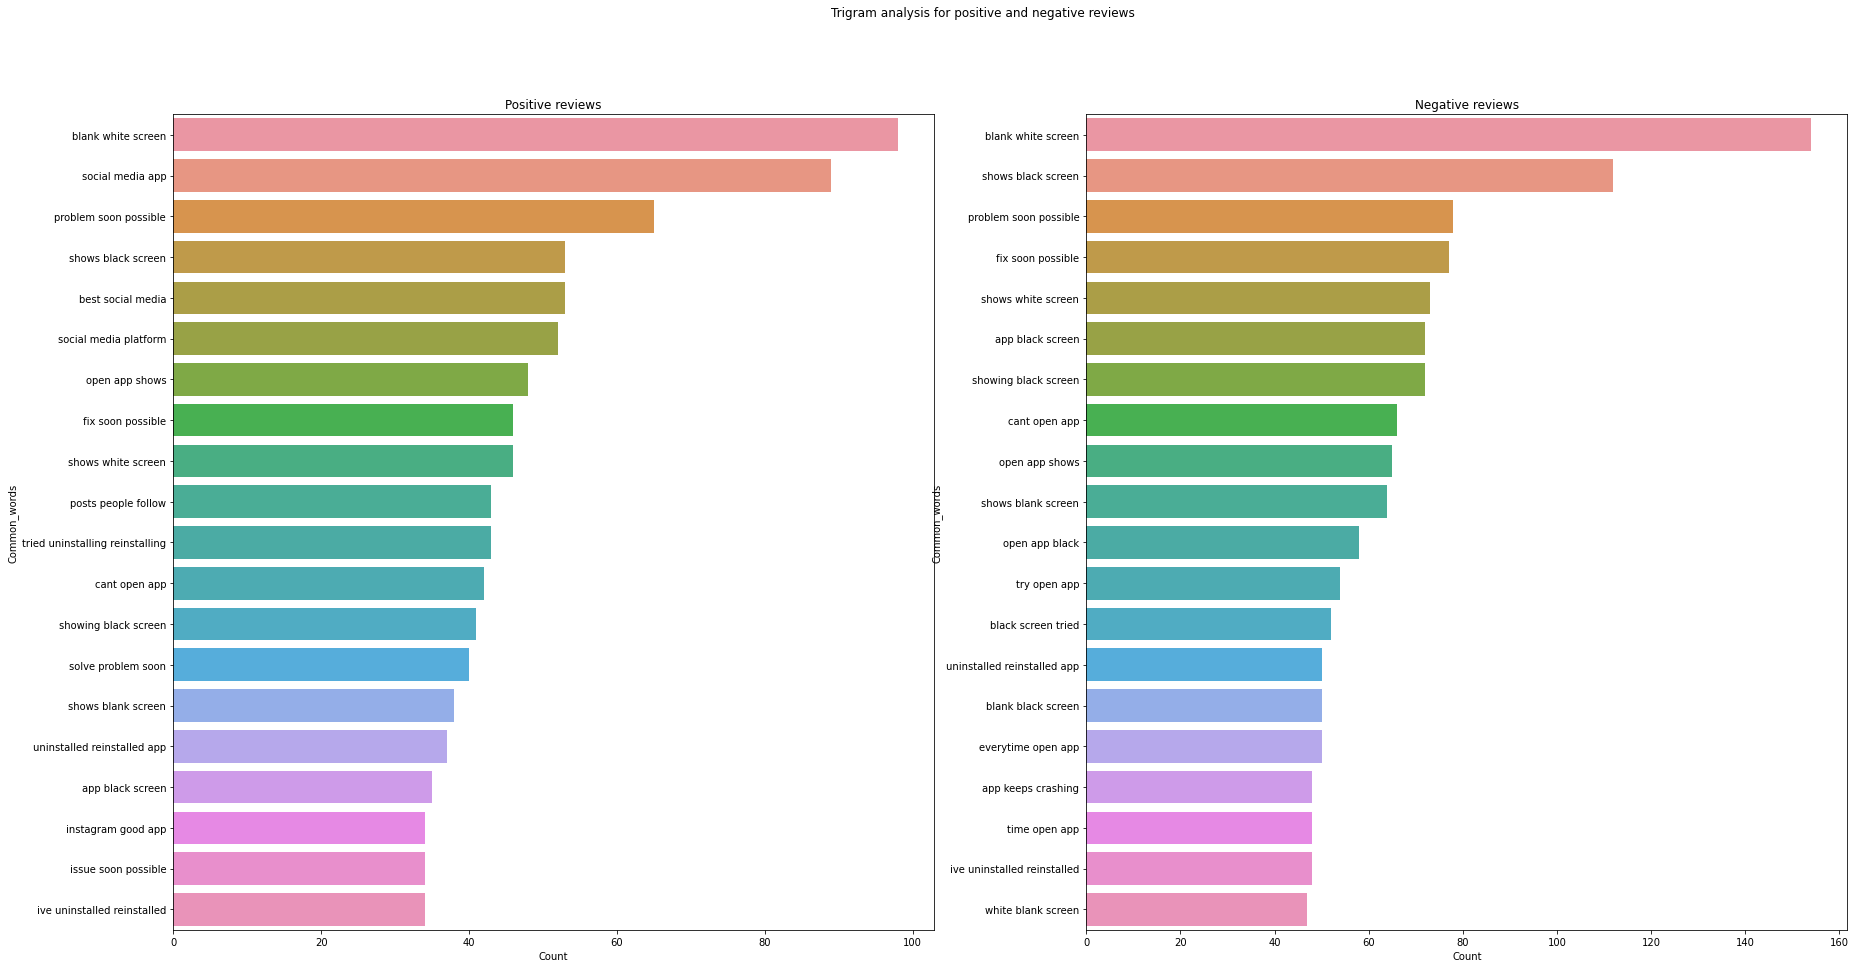

In [57]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [58]:
df.head()

,content,score,Clean_Text,polarity,subjectivity,sentiment
0,awesome app love that i can post my original s...,5,awesome app love post original singing got rem...,0.252778,0.684127,1
1,ever since mark zuckerberg bought this softwar...,1,mark zuckerberg bought software silly problems...,-0.060714,0.386607,0
2,they need to increase the reel time duration a...,4,need increase reel time duration story too iss...,0.187500,0.487500,1
3,"there isn't an ""edit"" feature for the comment....",3,edit feature comment uninteresting ads follow ...,0.300000,0.533333,1
4,"like we like a reel, it covers like a phone, a...",1,like like reel covers like phone attached phon...,-0.125000,0.375000,0


In [59]:
df.rename(columns = {'Clean_Text':'review'}, inplace = True)

In [60]:
df.head()

,content,score,review,polarity,subjectivity,sentiment
0,awesome app love that i can post my original s...,5,awesome app love post original singing got rem...,0.252778,0.684127,1
1,ever since mark zuckerberg bought this softwar...,1,mark zuckerberg bought software silly problems...,-0.060714,0.386607,0
2,they need to increase the reel time duration a...,4,need increase reel time duration story too iss...,0.187500,0.487500,1
3,"there isn't an ""edit"" feature for the comment....",3,edit feature comment uninteresting ads follow ...,0.300000,0.533333,1
4,"like we like a reel, it covers like a phone, a...",1,like like reel covers like phone attached phon...,-0.125000,0.375000,0


## splitting into train and test

In [61]:

train, test= train_test_split(df, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

In [62]:
train, test = train_test_split(df, test_size=0.2)

## model building

In [63]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Auto NLP processing on NLP Column: review
Shape of Train Data: 15997 rows
    Shape of Test Data: 4000 rows


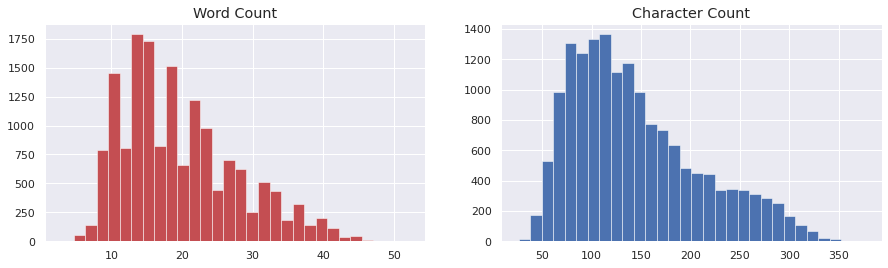

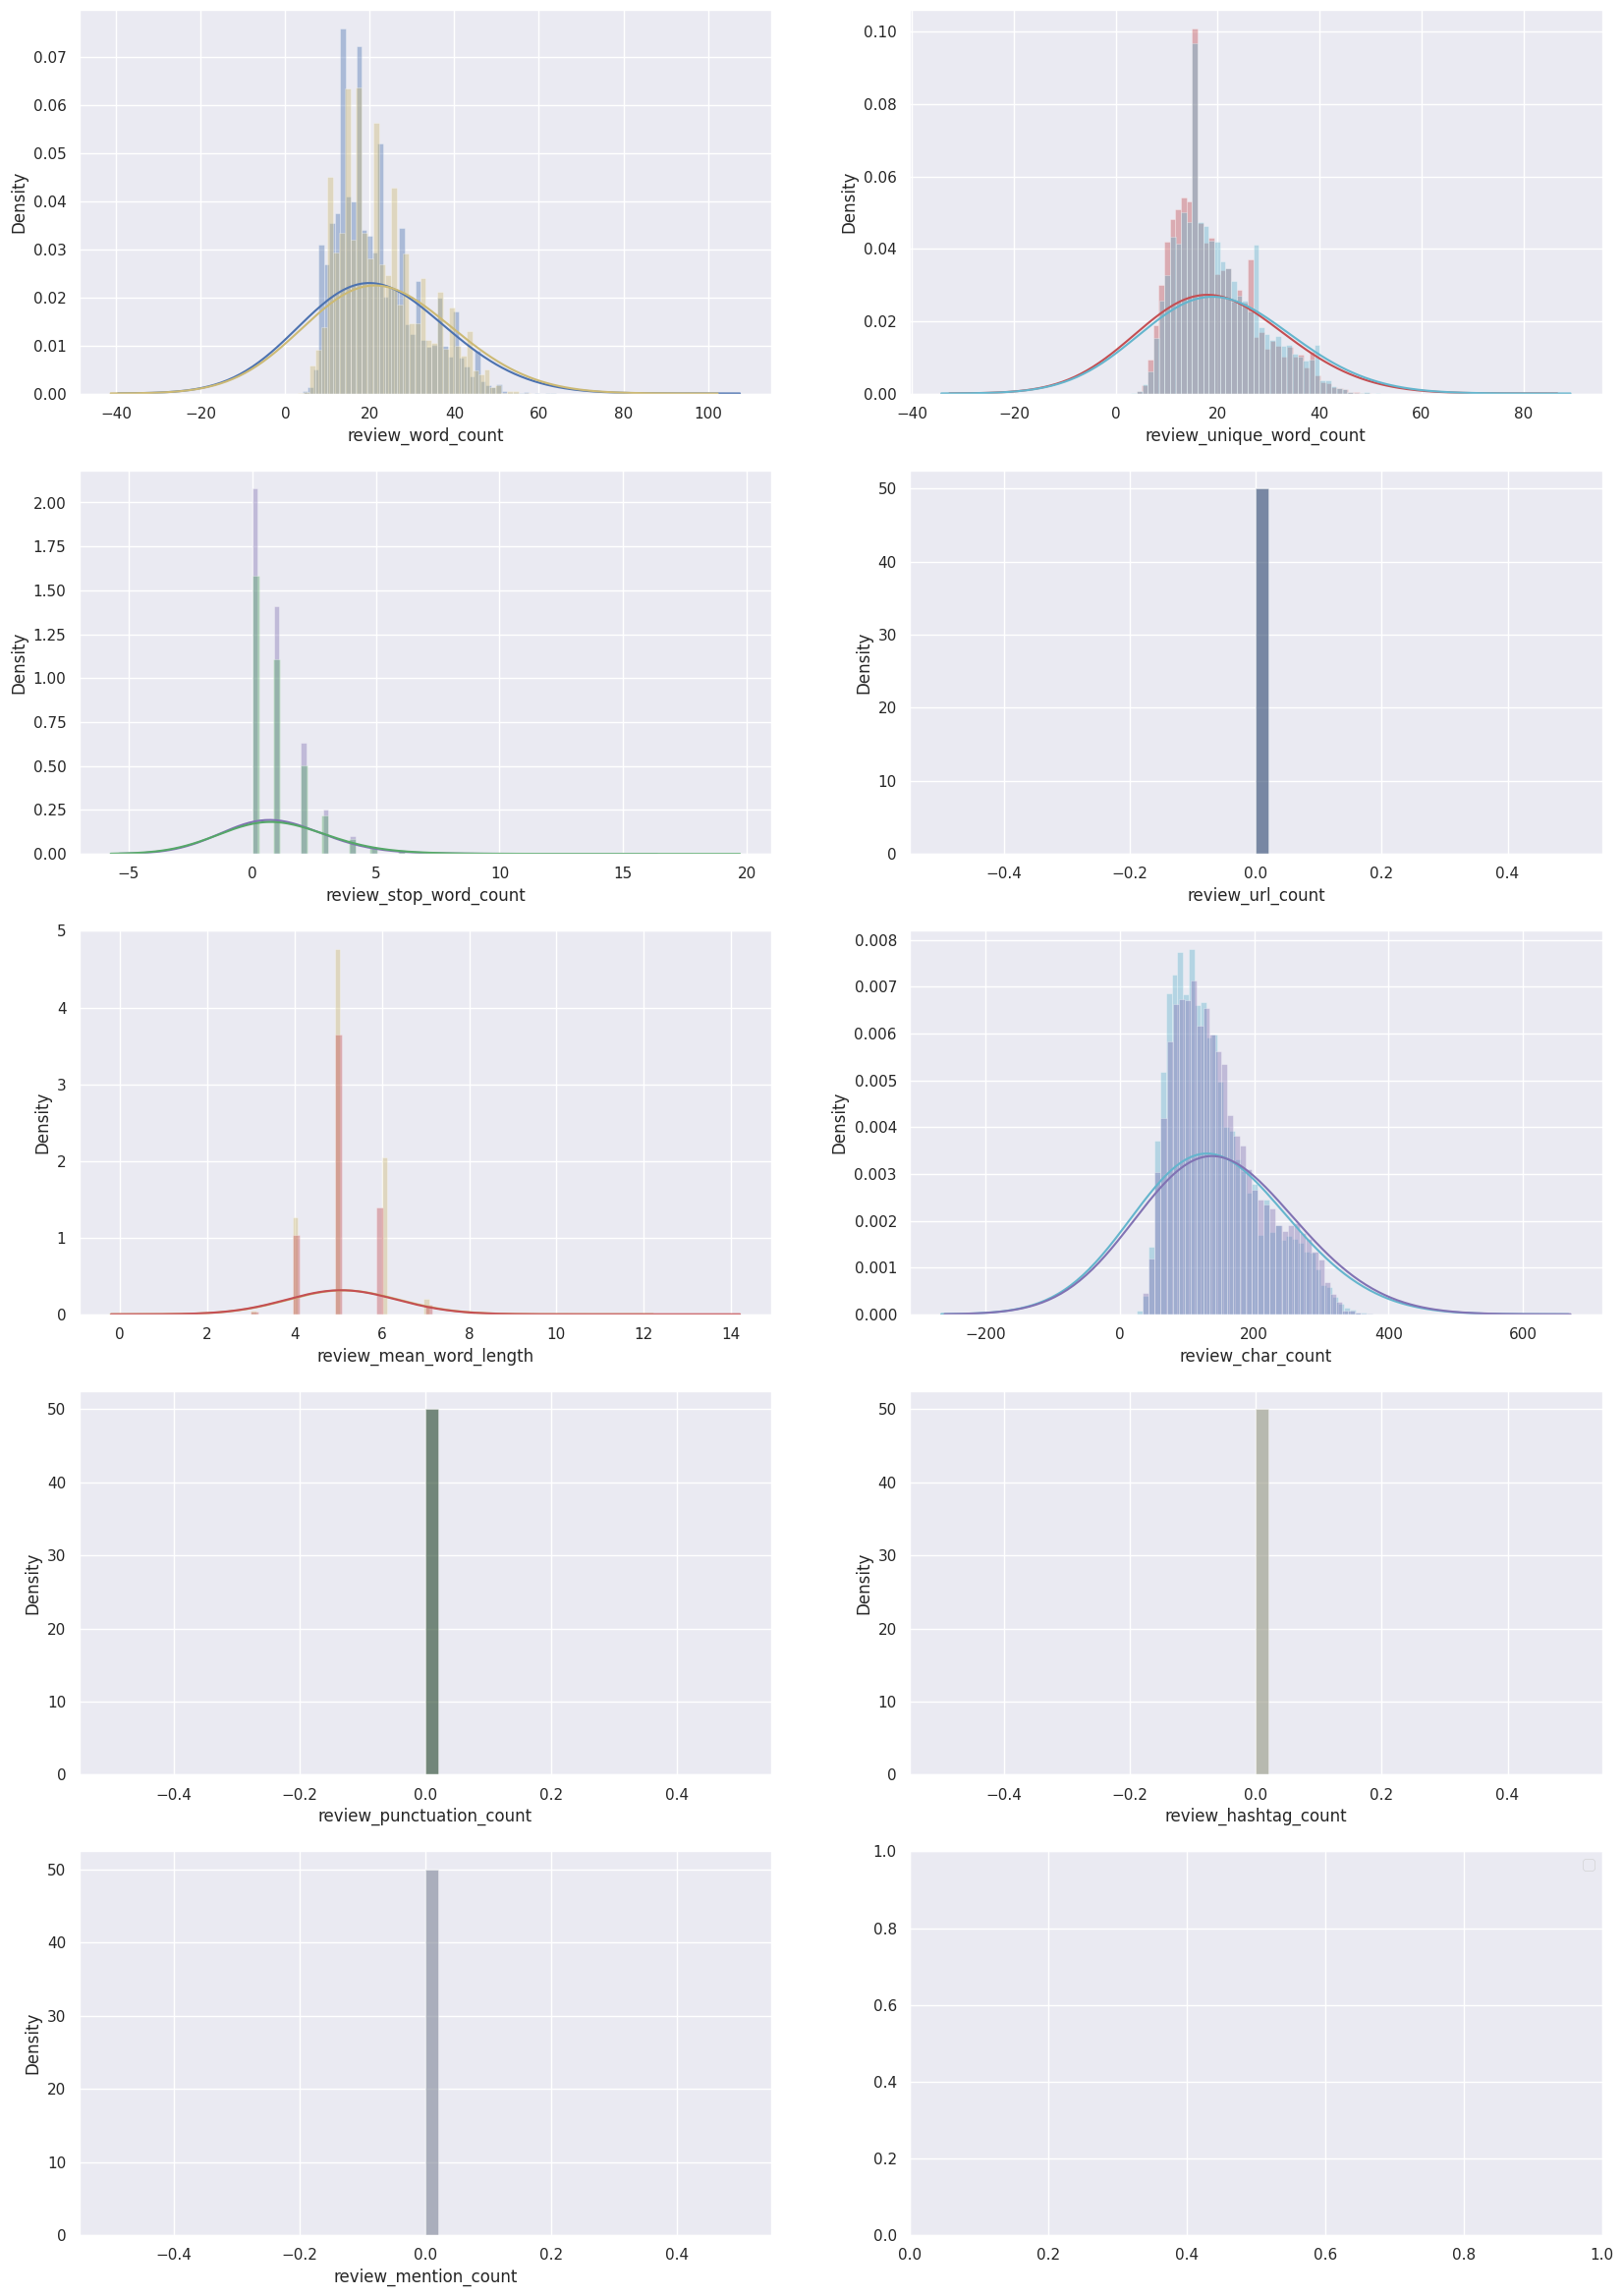

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for review column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 18 seconds

For target = sentiment

    For class = 0
Top 200 n-grams
: ['instagram', 'screen', 'open', 'tri', 'fix', 'work', 'cant', 'updat', 'time', 'post', 'problem', 'show', 'account', 'reel', 'black', 'reinstal', 'stori', 'blank', 'uninstal', 'issu', 'like', 'im', 'video', 'use', 'day', 'white', 'phone', 'ive', 'bug', 'messag', 'log', 'annoy', 'soon', 'happen', 'want', 'instal', 'load', 'feed', 'new', 'possibl', 'option', 'abl', 'delet', 'help', 'know', 'photo', 'week', 'unabl', 'crash', 'page', 'login', 'bad', 'worst', 'glitch', 'peopl', 'pictur', 'keep', 'upload', 'chang', 'stop', 'disappoint', 'follow', 'frustrat', 'month', 'restart', 'send', 'thing', 'ad', 'properli', 'now', 'need', 'recent', 'way', 'featur', 'insta', 'r

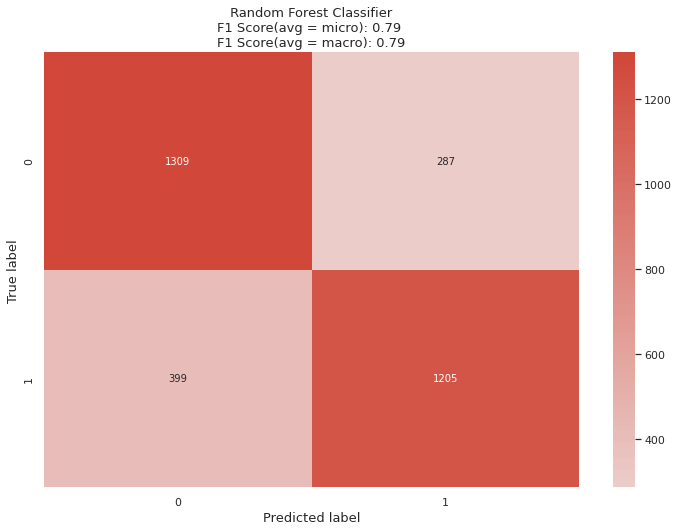

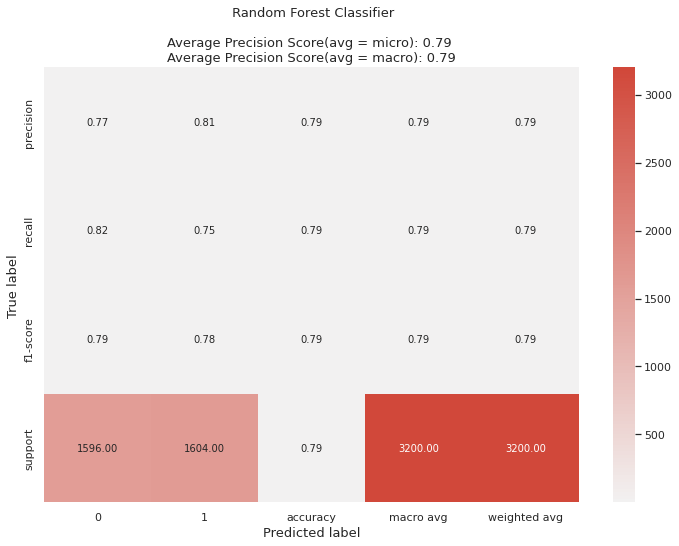

  Now transforming Train data to return as output...
  Transforming Test data to return as output...
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
Training completed. Time taken for Auto_NLP = 31.2 minutes


In [64]:
nlp_column = 'review'
target = 'sentiment'

train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(nlp_column, train, test, target, score_type='balanced_accuracy', modeltype='Classification', top_num_features=500, verbose = 2, build_model=True
)

In [65]:
nlp_transformer.predict(test_nlp[nlp_column])

array([1, 1, 1, ..., 0, 0, 0])

In [66]:
nlp_transformer.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function Auto_NLP.<locals>.<lambda> at 0x7f0333c9bdd0>)),
                ('tfidfvectorizer',
                 TfidfVectorizer(binary=True, encoding='latin-1',
                                 max_df=0.1170917638857134, max_features=3476,
                                 min_df=2, ngram_range=(1, 3),
                                 sublinear_tf=True, token_pattern='\\w{1,}')),
                ('selectkbest',
                 SelectKBest(k=3476,
                             score_func=<function chi2 at 0x7f033901be60>)),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=200,
                                                                              n_jobs=-1,
                                                                              random_state=99),
                             

In [67]:
test_nlp['label'] = nlp_transformer.predict(test_nlp[nlp_column])

In [68]:
test_nlp

,content,score,review,polarity,subjectivity,sentiment,review_word_count,review_unique_word_count,review_stop_word_count,review_url_count,review_mean_word_length,review_char_count,review_punctuation_count,review_hashtag_count,review_mention_count,aap,abil,abl,abl access,abl add,abl log,abl login,abl login account,abl open,abl open applic,abl open instagram,abl post,abl react,abl reel,abl repli,abl send,abl share,abl upload,abl use,abl use applic,abl use instagram,abl watch,absolut,acc,accept,access,access account,access applic,access instagram,accid,accord,account abl,account account,account applic,account back,...,work tri,work tri open,work uninst,work uninst reinstal,work updat,work use,work want,work week,work well,work white,work white screen,work work,world,worri,worst,worst applic,worst applic ever,worst day,worst experi,worst thing,worst updat,worth,would,wow,write,written,wrong,wrong applic,wrong instagram,wrong tri,wrost,wrote,wth,x,yall,ye,yeah,year,year ago,year now,year recent,yesterday,yet,your,youtub,zero,zero star,zoom,zuckerberg,label
12894,"it's a best application for everyone in this platform. it gives us all content activity whatever, i really like this application.",5,best application platform gives content activity whatever like application,0.60,0.25,1,9,8,0,0,7,74,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1767,"this used to be a good app but now it won't let ,e post anything then it keeps showing instagram has stopped and don't get me wrong but i've tried everything but it still doesn't work please fix this problem",4,good app let e post keeps showing instagram stopped wrong ive tried work fix problem,0.10,0.75,1,15,15,0,0,4,84,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
8860,"everything is good but, still i am unable to react on personal chats, this feature isn't updated in my instagram.",4,good but unable react personal chats feature updated instagram,0.07,0.47,1,9,9,0,0,6,62,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
18575,"all of a sudden the app won't open. i've tried everything. restarting the phone, the app, clearing cache and data, uninstalling and reinstalling, turning location on and off. insta lite opens. instagram opens in browser and on my pc but after installing the update the insta app is not opening on my samsung s21 ultra 5g. however, it opens on my samsung note 9... this was my favorite app and i'm at my whims end. help.",1,sudden app open ive tried everything restarting phone app clearing cache data uninstalling reinstalling turning location off insta lite opens instagram opens browser pc installing update insta app opening samsung s21 ultra 5g however opens samsung note 9 favorite app im whims end help,0.17,0.67,1,44,37,0,0,5,285,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [69]:
df

,content,score,review,polarity,subjectivity,sentiment
0,awesome app love that i can post my original singing just got to remember to trim timeline down love all the stickers and effects to decorate vidoes. not alot of annoying adds plenty of cool content to check out.,5,awesome app love post original singing got remember trim timeline love stickers effects decorate vidoes alot annoying adds plenty cool content check out,0.25,0.68,1
1,"ever since mark zuckerberg bought this software, it has always had silly problems. updates are not activated for everyone, there is a special rule for each account, accounts are banned without reason, without violating privacy, and incomprehensible bugs always arise. even the support group does not give a correct answer to anyone. my account was closed multiple times for no reason, my picture was requested with a code, and i sent it, and none of my accounts was never opened again.",1,mark zuckerberg bought software silly problems updates activated everyone special rule account accounts banned reason violating privacy incomprehensible bugs arise support group correct answer anyone account closed multiple times reason picture requested code sent it accounts opened again,-0.06,0.39,0
2,they need to increase the reel time duration and story too. other than this issue i'm enjoying instagram.,4,need increase reel time duration story too issue im enjoying instagram,0.19,0.49,1
3,"there isn't an ""edit"" feature for the comment. too many uninteresting ads. too many follow requests from unknown and uninteresting persons.",3,edit feature comment uninteresting ads follow requests unknown uninteresting persons,0.30,0.53,1
4,"like we like a reel, it covers like a phone, as if it is attached to the phone, why won't it happen in my phone in other people's phone?",1,like like reel covers like phone attached phone happen phone peoples phone,-0.12,0.38,0
...,...,...,...,...,...,...
19995,"this is the 2nd time i write a review... anyway, unable to post stories on an s20 fe 5g. i do the normal routine and when i click share nothing happens. the story doesn't post at all. it just circles like it's loading and then nothing happens. 2 stars because everything else still works, but ""stories"" are a big part of social media now, so... yea. fix it?",2,2nd time write review anyway unable post stories s20 fe 5g normal routine click share happens story post all circles like loading happens 2 stars works stories big social media now so yea fix it,-0.06,0.26,0
19996,can no longer upload a story (photo/video) in stories by pushing 'share' it will just circle around the 'your story' circle at the top left and then stop and when you check for your story it hasnt uploaded. i can still upload a photo story only but only by pushing on 'your stories' tab at the bottom left - i have uninstalled and installed and cleared cache many times but still doesn't work !,2,longer upload story photovideo stories pushing share circle your story circle left stop check story hasnt uploaded upload photo story pushing your stories tab left uninstalled installed cleared cache times work,0.19,0.50,1
19997,"my account was banned for no reason at all, my account was hacked by someone from indonesia, i have even got the mail about it, i hav tried submitting it for review you are not even taking that, because of that account am not able to access my facebook which was linked to it, and i tried creating a new after 2 weeks and i am still having problems! what's going on insta??????",1,account banned reason all account hacked indonesia got mail it hav tried submitting review taking that account able access facebook linked it tried creating new 2 weeks problems whats going insta,-0.04,0.54,0
19998,from last two months instagram has become the worst app ever grime it updates. coz whenever i try to open reels for a short break from studies every other reel gets stuck and only audio use to play. sometimes i have to go up and down from one reel to other until it

In [70]:
#Vectorizing data

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vect.transform(Xtest)
count_vect = CountVectorizer() # CountVectorizer
Xtrain_count = count_vect.fit_transform(Xtrain)
Xtest_count = count_vect.transform(Xtest)

Logistic Regression Accuracy : 80.75%
[[1670  356]
 [ 414 1560]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2026
           1       0.81      0.79      0.80      1974

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



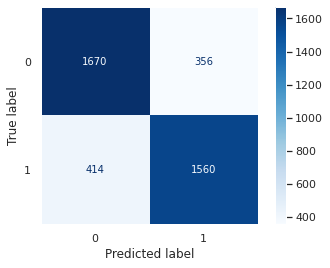

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,ytrain)
p1=lr.predict(Xtest_tfidf)
s1=accuracy_score(ytest,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(confusion_matrix(ytest, p1))
print(metrics.classification_report(ytest, p1))

Linear Support Vector Classifier Accuracy : 79.80%
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2026
           1       0.81      0.77      0.79      1974

    accuracy                           0.80      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.80      0.80      0.80      4000



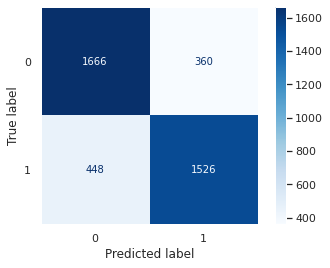

In [72]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(Xtrain_tfidf,ytrain)
p3=linear_svc.predict(Xtest_tfidf)
s3=accuracy_score(ytest,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p3))

XGBoost Accuracy : 81.05%
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2026
           1       0.84      0.76      0.80      1974

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



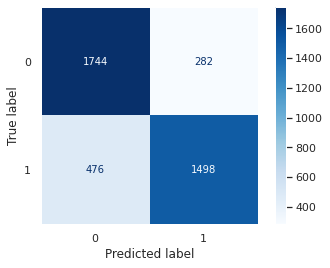

In [73]:
xgbo = XGBClassifier()
xgbo.fit(Xtrain_tfidf,ytrain)
p4=xgbo.predict(Xtest_tfidf)
s4=accuracy_score(ytest,p4)
print("XGBoost Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p4))

Random Forest Accuracy : 81.05%
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      2026
           1       0.82      0.73      0.77      1974

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000



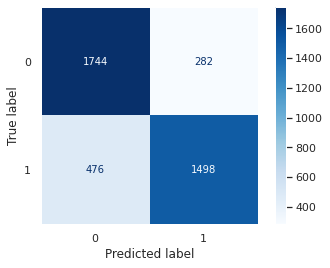

In [74]:
rf = RandomForestClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p5=rf.predict(Xtest_tfidf)
s5=accuracy_score(ytest,p4)
print("Random Forest Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p5))

Decision Tree Accuracy : 81.05%
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2026
           1       0.71      0.73      0.72      1974

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



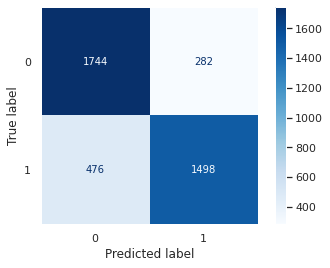

In [75]:
rf = DecisionTreeClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p6=rf.predict(Xtest_tfidf)
s6=accuracy_score(ytest,p4)
print("Decision Tree Accuracy :", "{:.2f}%".format(100*s6))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p6))

In [76]:
df

,content,score,review,polarity,subjectivity,sentiment
0,awesome app love that i can post my original singing just got to remember to trim timeline down love all the stickers and effects to decorate vidoes. not alot of annoying adds plenty of cool content to check out.,5,awesome app love post original singing got remember trim timeline love stickers effects decorate vidoes alot annoying adds plenty cool content check out,0.25,0.68,1
1,"ever since mark zuckerberg bought this software, it has always had silly problems. updates are not activated for everyone, there is a special rule for each account, accounts are banned without reason, without violating privacy, and incomprehensible bugs always arise. even the support group does not give a correct answer to anyone. my account was closed multiple times for no reason, my picture was requested with a code, and i sent it, and none of my accounts was never opened again.",1,mark zuckerberg bought software silly problems updates activated everyone special rule account accounts banned reason violating privacy incomprehensible bugs arise support group correct answer anyone account closed multiple times reason picture requested code sent it accounts opened again,-0.06,0.39,0
2,they need to increase the reel time duration and story too. other than this issue i'm enjoying instagram.,4,need increase reel time duration story too issue im enjoying instagram,0.19,0.49,1
3,"there isn't an ""edit"" feature for the comment. too many uninteresting ads. too many follow requests from unknown and uninteresting persons.",3,edit feature comment uninteresting ads follow requests unknown uninteresting persons,0.30,0.53,1
4,"like we like a reel, it covers like a phone, as if it is attached to the phone, why won't it happen in my phone in other people's phone?",1,like like reel covers like phone attached phone happen phone peoples phone,-0.12,0.38,0
...,...,...,...,...,...,...
19995,"this is the 2nd time i write a review... anyway, unable to post stories on an s20 fe 5g. i do the normal routine and when i click share nothing happens. the story doesn't post at all. it just circles like it's loading and then nothing happens. 2 stars because everything else still works, but ""stories"" are a big part of social media now, so... yea. fix it?",2,2nd time write review anyway unable post stories s20 fe 5g normal routine click share happens story post all circles like loading happens 2 stars works stories big social media now so yea fix it,-0.06,0.26,0
19996,can no longer upload a story (photo/video) in stories by pushing 'share' it will just circle around the 'your story' circle at the top left and then stop and when you check for your story it hasnt uploaded. i can still upload a photo story only but only by pushing on 'your stories' tab at the bottom left - i have uninstalled and installed and cleared cache many times but still doesn't work !,2,longer upload story photovideo stories pushing share circle your story circle left stop check story hasnt uploaded upload photo story pushing your stories tab left uninstalled installed cleared cache times work,0.19,0.50,1
19997,"my account was banned for no reason at all, my account was hacked by someone from indonesia, i have even got the mail about it, i hav tried submitting it for review you are not even taking that, because of that account am not able to access my facebook which was linked to it, and i tried creating a new after 2 weeks and i am still having problems! what's going on insta??????",1,account banned reason all account hacked indonesia got mail it hav tried submitting review taking that account able access facebook linked it tried creating new 2 weeks problems whats going insta,-0.04,0.54,0
19998,from last two months instagram has become the worst app ever grime it updates. coz whenever i try to open reels for a short break from studies every other reel gets stuck and only audio use to play. sometimes i have to go up and down from one reel to other until it

<AxesSubplot:ylabel='score'>

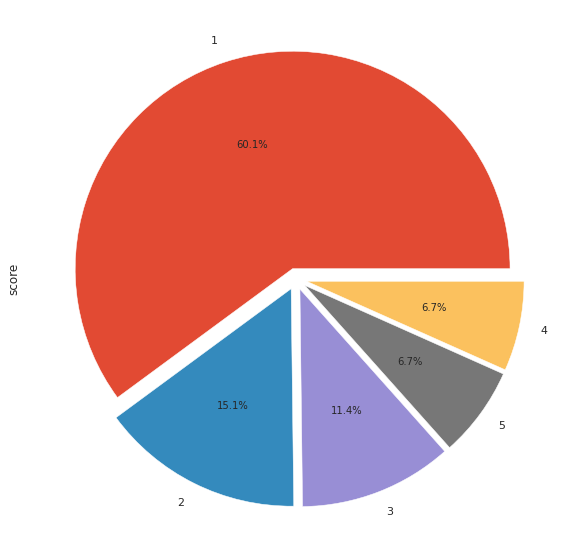

In [77]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
df['score'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct ='%1.1f%%', explode=explode)

<AxesSubplot:ylabel='sentiment'>

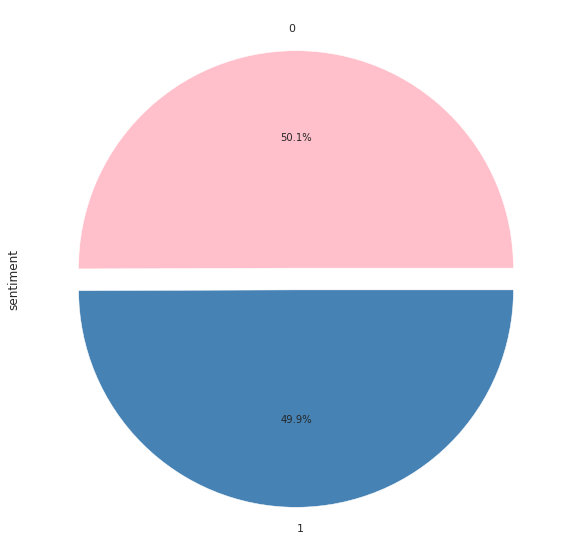

In [78]:
explode = (0.05, 0.05)
colors = ['pink', 'steelblue']
df['sentiment'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct ='%1.1f%%', explode=explode, colors=colors)